In [ ]:
#Se procede a importar y descargar las librerias correspondientes
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
import math

Comenzamos planteando las variables simbólicas `E`, `e` y `M`, las cuales son **anomalía excéntrica** (`E`), la **excentricidad** (`e`), y la **anomalía media** (`M`).
A partir de esto definimos la función $f(E) = E-e\sin(E) - M$ , la cual es la ecuación de Kepler para el movimiento planetario. Luego, se calcula la derivada de esta función con respecto a `E`. El resultado es:
  
  $$\frac{df}{dE} = 1 - e \cos(E)$$


In [ ]:
from sympy import symbols, diff, sin
E = symbols('E')
#Calculamos la derivada de la función f = E - e*sin(E)-M con respecto a E, dicha función es la ecuación de Keppler para el movimiento de los planetas.
E, e, M = symbols('E e M')
f = E- e*sin(E) - M
#Función en phyton para el calculo de la derivada: "(diff(función))"
df = diff(f,E)
print(df)

-e*cos(E) + 1


In [ ]:
#Esto ultimo se puede realizar con Class, esto lo usaremos para no solo demostrar otro método para calcular la derivada sin usar la libreria y crear objectos.

class Keepler:
 def __init__(self, excentricidad, anomalia_media):
  self.e = excentricidad
  self.M = anomalia_media
  self.E = symbols('E')

 def funcion(self):
  return self.E - self.e*sin(self.E) - self.M

 def derivada(self):
  return diff(self.funcion(), self.E)

# Se crea un objecto de la clase planeta
planeta = Keepler(e, M) #valores de ejemplo para e y M

#Imprimimos Funcion y derivada
print("Función: ", planeta.funcion())
print("Derivada: ", planeta.derivada())


Función:  E - M - e*sin(E)
Derivada:  -e*cos(E) + 1


In [ ]:
# Procedemos a definir las excentricidades y anomalias medias de los planetas

datos_planetas = {
 "mercurio": {"e": 0.2056, "M": 174.796},
 "venus": {"e": 0.0068, "M": 50.115},
 "tierra": {"e": 0.0167, "M": 358.617},
 "marte": {"e": 0.0934, "M": 19.412},
 "jupiter": {"e": 0.0489, "M": 20.020},
 "saturno": {"e": 0.0565, "M": 317.020},
 "urano": {"e": 0.0463, "M": 142.590},
 "neptuno": {"e": 0.0097, "M": 256.228}
}

El método Newton-Raphson es un aloritmo que permite encontrar raíces de funciones. En términos simples, se puede describir así:
Se busca encontrar el valor de $x$ que hace que una función $f(x) = 0$.
S empieza con una suposición inicial de $x$ (llamada $x_0$) que posiblemente se encuentre cerca de la solución. **Iteracion**: Se usa la función y su derivada para mejorar la suposición. La fórmula básica es:
$$
  x_{\text{nuevo}} = x - \frac{f(x)}{f'(x)}
$$
  Aquí, $ f'(x) $ es la derivada de la función, que dicta cómo cambia la función en aquel punto.

Se **Repite** el proceso usando el nuevo valor $ x_{\text{nuevo}} $ como una nueva suposición. Se realiza esto varias veces hasta que la diferencia entre las suposiciones sucesivas sea muy pequeña (es decir, hasta que estemos "cerca" de la solución).

Como **Resultado**, cuando el proceso se detiene, el valor de $x$ que hemos encontrado es una buena aproximación de la raíz de la función.

In [ ]:
#A continuación se define el ciclo con el que vamos a calcular las orbitas, esto usando el Metodo Newton-Raphson, que calcula la derivada anterior de forma númerica

"Para la funcion Función:  E - M - e*sin(E) tenemos la Derivada:  -e*cos(E) + 1"

def newton_raphson(E0, M, e, epsilon, max_iter):
 E = E0
 E_valores = [] #Esto es una lista para guardar los valores de E que es la anómalia excéntrica
 for i in range(max_iter):
  f = E - M - e*math.sin(E)
  df = 1 - e*math.cos(E)
  E_new = E - f / df
  E_valores.append(E_new) #Esto se realiza para guardar los nuevos valores.
  error = abs((E_new - E)/ E_new)
  if error < epsilon:
   return E_new, i + 1, E_valores
  E = E_new
 return E, max_iter, E_valores

In [ ]:
# Ingreso del nombre del planeta

nombre_planeta = input("Ingrese el nombre del planeta en cuestión (ejemplo: mercurio, jupiter, neptuno.): ").lower()

# Se procede a verificar si se encuentra en el diccionario (ejemplo, plutón no está)

if nombre_planeta in datos_planetas:
 # Extraer excentricidad y anomalía media del planeta
 e = datos_planetas[nombre_planeta]["e"]
 M = datos_planetas[nombre_planeta]["M"]
else:
    print("El planeta ingresado no está en la lista.")

Ingrese el nombre del planeta en cuestión (ejemplo: mercurio, jupiter, neptuno.): mercurio


In [ ]:
#Solicitar parámetros importantes
E0 = float(input("Introduce E0 (valor inicial para la anomalía excéntrica): "))
max_iter = int(input("Digite el número máximo de iteraciones: "))
epsilon = float(input("Digite el error permitido (epsilon): "))
a = float(input("Ingresa 'a' (semieje mayor de la órbita en kilómetros): "))
# Se procede a calcular la anomalía excéntrica usando el método de Newton-Raphson
result, iterations, E_valores = newton_raphson(E0, M, e, epsilon, max_iter)
print(f"E = {result} luego de {iterations} iteraciones.")

Introduce E0 (valor inicial para la anomalía excéntrica): 1
Digite el número máximo de iteraciones: 90
Digite el error permitido (epsilon): 1e-15
Ingresa 'a' (semieje mayor de la órbita en kilómetros): 58065000
E = 174.59618555255506 luego de 7 iteraciones.


In [ ]:
# Creamos una clase para calcular la anomalía verdadera
class Anomalia_Verdadera:
  def calcular_v(self, E_new, e):
    self.E_new = E_new
    self.e = e
    return math.atan((math.sqrt((1+self.e)/(1-self.e))) * math.tan(self.E_new/2))
# Calcular la anomalía verdadera
data = Anomalia_Verdadera()
v_valores = [data.calcular_v(E, e) for E in E_valores]  # Lista de anomalías verdaderas

In [ ]:
# Clase para calcular la distancia
class distancia:
  def __init__(self, a, e):
    self.a = a
    self.e = e
  def calcular_r(self, v):
   return (self.a*(1 - self.e**2))/(1 + self.e*math.cos(v))
# Calcular la distancia para cada valor de la anomalía verdadera
dist = distancia(a=a, e=e)

r_valores = [dist.calcular_r(v) for v in v_valores]  # Lista de distancias

In [ ]:
# Resultados
print(f"v es {v_valores[-1]} rad")
print(f"La distancia del planeta es {r_valores[-1]} kilómetros.")
print(f"Para lograr estos resultados, la anomalía excéntrica {result} se obtuvo en {iterations} iteraciones con un error de {epsilon}.")

v es -0.7696538916276172 rad
La distancia del planeta es 48455904.17299396 kilómetros.
Para lograr estos resultados, la anomalía excéntrica 174.59618555113363 se obtuvo en 5 iteraciones con un error de 1e-06.


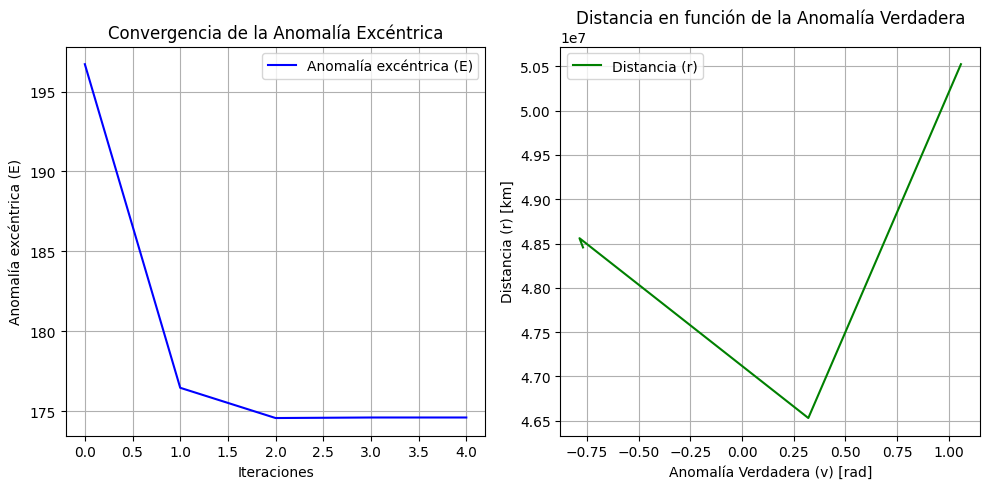

In [ ]:
# Gráfica de la anomalía excéntrica
plt.figure(figsize=(10, 5))

# Gráfica 1: Anomalía excéntrica a lo largo de las iteraciones
plt.subplot(1, 2, 1)
plt.plot(range(len(E_valores)), E_valores, label="Anomalía excéntrica (E)", color='blue')
plt.xlabel("Iteraciones")
plt.ylabel("Anomalía excéntrica (E)")
plt.title("Convergencia de la Anomalía Excéntrica")
plt.grid(True)
plt.legend()

# Gráfica 2: Distancia en función de la anomalía verdadera
plt.subplot(1, 2, 2)
plt.plot(v_valores, r_valores, label="Distancia (r)", color='green')
plt.xlabel("Anomalía Verdadera (v) [rad]")
plt.ylabel("Distancia (r) [km]")
plt.title("Distancia en función de la Anomalía Verdadera")
plt.grid(True)
plt.legend()

# Mostrar las gráficas
plt.tight_layout()
plt.show()

La velocidad orbital en la posición actual es 74020.52 km/s.


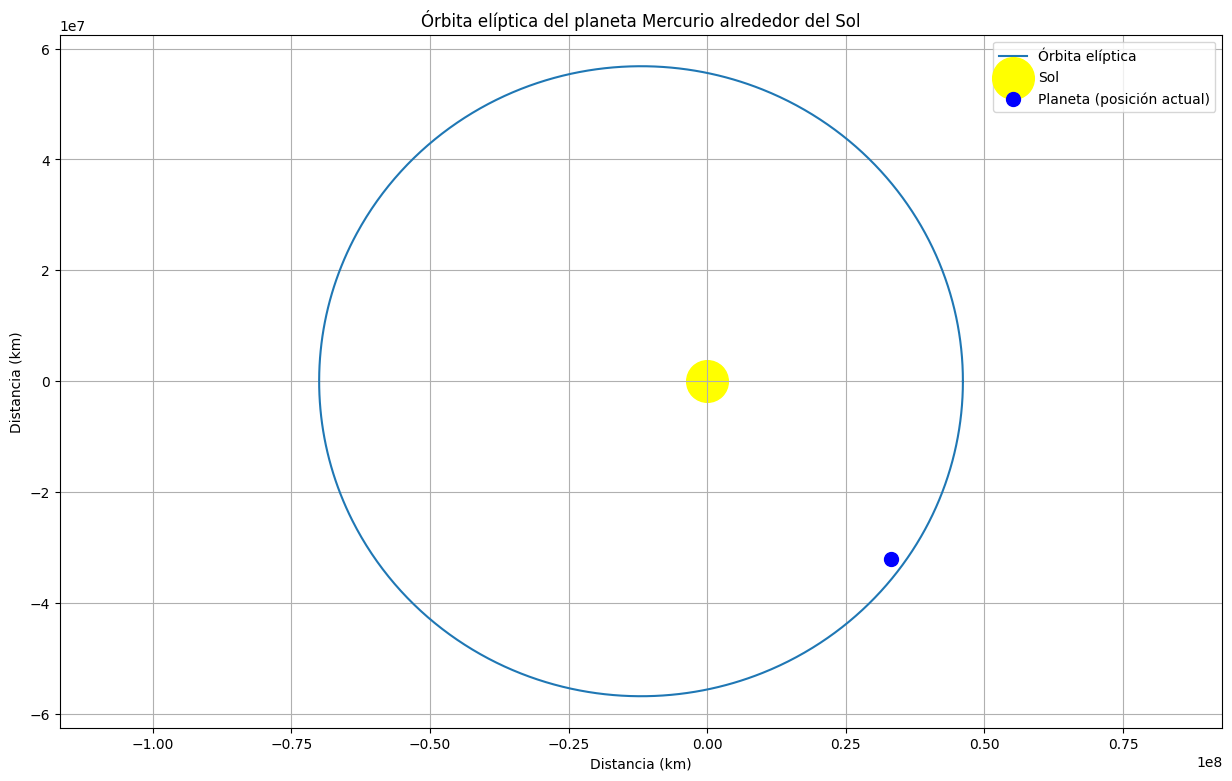

In [ ]:
# ---- Nuevos cálculos para la órbita y la velocidad ----
# Constantes
G = 6.674 * 10**(-11)  # Constante gravitacional en m^3/kg/s^2
M_kg = 1.989 * 10**30  # Masa del Sol en kilogramos

# Cálculo de la velocidad orbital en el punto actual (última iteración)
r_km = r_valores[-1]
v_km_s = np.sqrt(2 * G * M_kg / (r_km * 1000))  # Velocidad en km/s
print(f"La velocidad orbital en la posición actual es {v_km_s:.2f} km/s.")

# ---- Gráfica de la órbita ----
# Generar puntos para la órbita elíptica
theta_vals = np.linspace(0, 2 * np.pi, 1000)  # 1000 puntos para el ángulo
r_vals = a * (1 - e**2) / (1 + e * np.cos(theta_vals))  # Radio en función de theta
x_vals = r_vals * np.cos(theta_vals)  # Coordenadas x
y_vals = r_vals * np.sin(theta_vals)  # Coordenadas y

# Gráfica de la órbita
plt.figure(figsize=(15, 9))
plt.plot(x_vals, y_vals, label="Órbita elíptica")
plt.scatter(0, 0, color='yellow', marker='o',s=900, label="Sol")  # Sol en el centro
plt.scatter(r_vals[0] * np.cos(v_valores[-1]), r_vals[0] * np.sin(v_valores[-1]),
            color='blue', marker='o',s=100, label="Planeta (posición actual)")  # Posición del planeta
plt.xlabel("Distancia (km)")
plt.ylabel("Distancia (km)")
plt.title(f"Órbita elíptica del planeta {nombre_planeta.capitalize()} alrededor del Sol")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()

Ingrese el nombre del planeta (ej. mercurio, venus, tierra, etc.): mercurio
Ingresa 'a' (semieje mayor de la órbita en kilómetros): 58065000


<ipython-input-13-8e224c165883>:34: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  planeta.set_data(x_vals[frame], y_vals[frame])


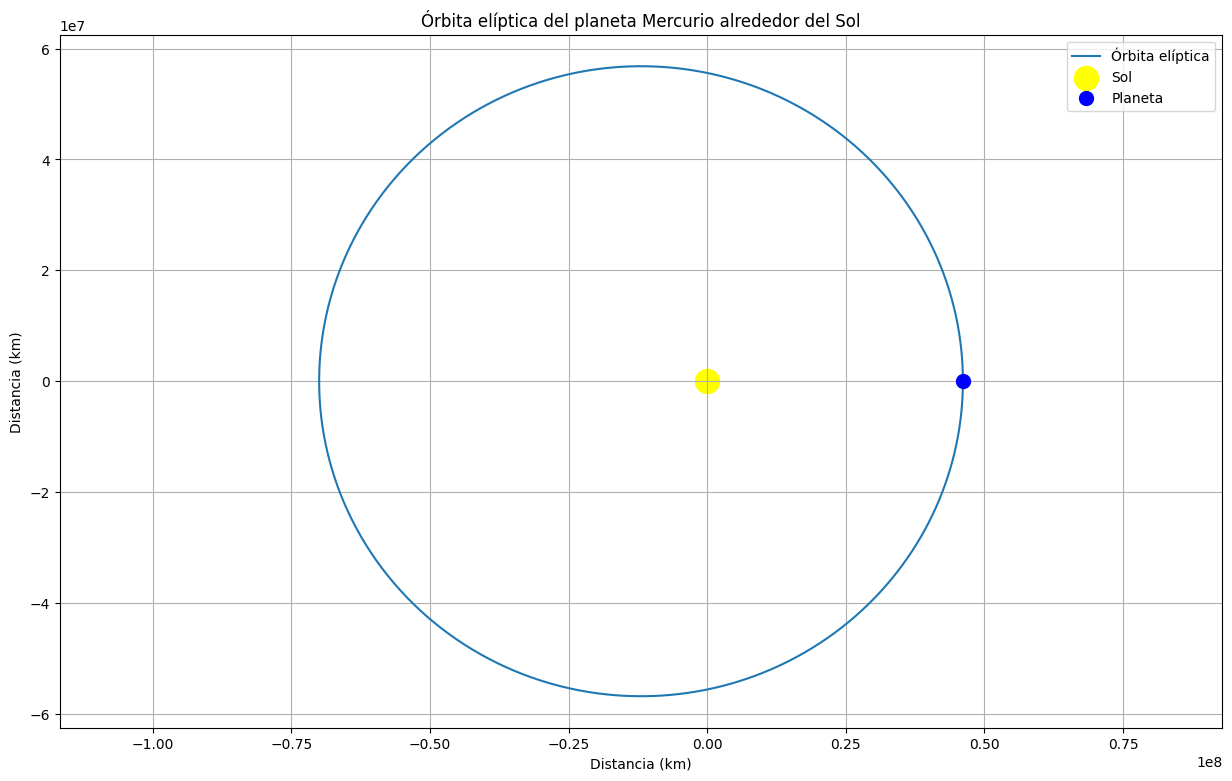

In [ ]:
from matplotlib.animation import FuncAnimation
# Ingreso del nombre del planeta
nombre_planeta = input("Ingrese el nombre del planeta (ej. mercurio, venus, tierra, etc.): ").lower()

# Verificar si el planeta está en el diccionario
if nombre_planeta in datos_planetas:
  e = datos_planetas[nombre_planeta]["e"]  # Excentricidad
  a_km = float(input("Ingresa 'a' (semieje mayor de la órbita en kilómetros): "))  # Semieje mayor
else:
  print("El planeta ingresado no está en la lista.")

# ---- Cálculo de la órbita ----
theta_vals = np.linspace(0, 2 * np.pi, 1000)  # 1000 puntos para el ángulo
r_vals = a * (1 - e**2) / (1 + e * np.cos(theta_vals))  # Radio en función de theta
x_vals = r_vals * np.cos(theta_vals)  # Coordenadas x
y_vals = r_vals * np.sin(theta_vals)  # Coordenadas y

# ---- Configuración de la gráfica ----
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(x_vals, y_vals, label="Órbita elíptica")
sol = ax.scatter(0, 0, color='yellow', marker='o', s=300, label="Sol")  # Sol en el centro
planeta, = ax.plot([], [], 'bo', markersize=10, label="Planeta")  # Planeta animado

plt.xlabel("Distancia (km)")
plt.ylabel("Distancia (km)")
plt.title(f"Órbita elíptica del planeta {nombre_planeta.capitalize()} alrededor del Sol")
plt.legend()
plt.grid(True)
plt.axis("equal")

# ---- Función de actualización para la animación ----
def actualizar(frame):
  # Actualiza la posición del planeta
  planeta.set_data(x_vals[frame], y_vals[frame])
  return planeta,

# ---- Crear la animación ----
frames = len(theta_vals)
anim = FuncAnimation(fig, actualizar, frames=frames, interval=50, blit=True)

# Mostrar la gráfica con animación
plt.show()